In [2]:
import matplotlib.pyplot as plt
import numpy as np

## 随机行走

In [4]:
def walk1(a, x):
    """
    一维等概率随机行走函数
    a为每次的行走步数x为初位置
    每次行走步长为1，有2个行走的方向，每个方向等概率
    """
    for i in range(a):
        p = np.random.rand()
        if p < 0.5:
            x += 1
        else:
            x -= 1
    return x


def walk2(a, x):
    """
    二维等概率随机行走函数
    a为每次的行走步数，x为初位置(二维坐标)
    每次行走步长为1，有4个行走的方向，每个方向等概率
    结构为先判断x或y方向的行走，再判断正向或反向行走
    """
    for i in range(a):  # 步数
        p = np.random.rand()
        if p < 0.5:  # x方向行走
            x[0] = walk1(1, x[0])
        else:
            x[1] = walk1(1, x[1])
    return x

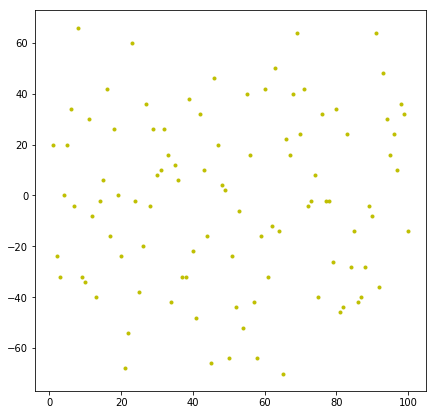

In [43]:
X = []
for n in range(100):
    x = walk1(1000, 0)
    X.append(x)
plt.figure(figsize=(7, 7))
plt.plot(np.arange(1, 101), X, 'y.')

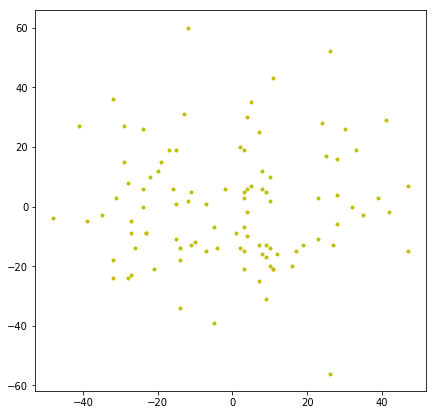

In [44]:
X = []
Y = []
for n in range(100):
    x = walk2(1000, np.array([0, 0]))
    X.append(x[0])
    Y.append(x[1])
plt.figure(figsize=(7, 7))
plt.plot(X, Y, 'y.')

## 随机生长

In [5]:
d = [np.array([10, 5])]
c = 1000
b = 30000
for n in range(c):
    g = np.random.rand()
    x = np.zeros(2)
    if g <= 0.25:
        x[0] = 50
        x[1] = np.random.randint(-50, 50)
    elif g <= 0.5 and g > 0.25:
        x[0] = -50
        x[1] = np.random.randint(-50, 50)
    elif g <= 0.75 and g > 0.5:
        x[1] = 50
        x[0] = np.random.randint(-50, 50)
    elif g <= 1:
        x[1] = -50
        x[0] = np.random.randint(-50, 50)

    track = [x]  # 记录每个粒子的轨迹

    for i in range(b):  # 步数
        p = np.random.rand()
        if p < 0.5:  # x方向行走
            x[0] = walk1(1, x[0])
        else:  # y方向行走
            x[1] = walk1(1, x[1])
        if abs(x[0]) > 50 or abs(x[1]) > 50:  # 出圈就重走
            x = track[-1]
            continue
        e = len(d)
        for m in range(len(d)):
            if (abs(x[0]-d[m][0]) == 0 and abs(x[1]-d[m][1]) == 1) or (abs(x[0]-d[m][0]) == 1 and abs(x[1]-d[m][1]) == 0):

                d.append(x)
                break
        if len(d) != e:
            break

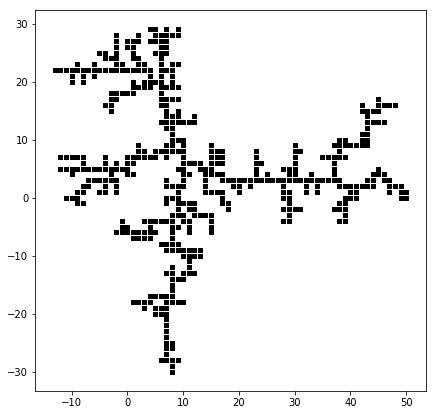

In [6]:
plt.figure(figsize=(7, 7))
for i in d:
    plt.scatter(i[0], i[1], s=15, marker='s', c='k')

调包

In [149]:
from random import random
import turtle


def draw_branch(branch_length):
    '''绘制树枝'''

    if branch_length > 5:
        turtle.forward(branch_length)

        # 绘制右侧树枝
        turtle.right(20)
        draw_branch(branch_length - 15)

        # 绘制左侧树枝
        turtle.left(40)
        draw_branch(branch_length - 15)

        # 返回之前的树枝
        turtle.right(20)
        turtle.backward(branch_length)


turtle.left(90)
draw_branch(80)
turtle.exitonclick()

KeyboardInterrupt: 

### 加入自回避

In [4]:
d = [np.array([10, 0])]
c = 10000
b = 600
for n in range(c):
    x = np.zeros(2)
    x[0] = 50
    x[1] = np.random.randint(-50, 50)
#     x=np.array([0,0])
    track = []
    for i in range(b):  # 步数
        p = np.random.rand()
        direction = 4

        for q in track:  # 判断是否回避
            if (abs(q[0]-x[0]) == 0 and abs(q[1]-x[1]) == 1) or (abs(q[0]-x[0]) == 1 and abs(q[1]-x[1]) == 0):  # 可走为1，不可走为0
                direction -= 1
        if direction == 0:  # 进入死胡同
            break

        if p < 0.5:  # x方向行走
            x[0] = walk1(1, x[0])
        else:  # y方向行走
            x[1] = walk1(1, x[1])

        flag = 0  # 标志是否与原有轨迹重合
        for q in track:  # 判断是否成功回避
            if q.all() == x.all():
                x = track[-1]
                flag = 1
                break

        if flag == 0:  # 可以继续走下去，记录下坐标作为轨迹
            track.append(x)

        e = len(d)
        for m in range(len(d)):
            if ((abs(x[0]-d[m][0]) == 0 and abs(x[1]-d[m][1]) == 1) or (abs(x[0]-d[m][0]) == 1 and abs(x[1]-d[m][1]) == 0)):

                d.append(x)
                break
        if len(d) != e:
            break

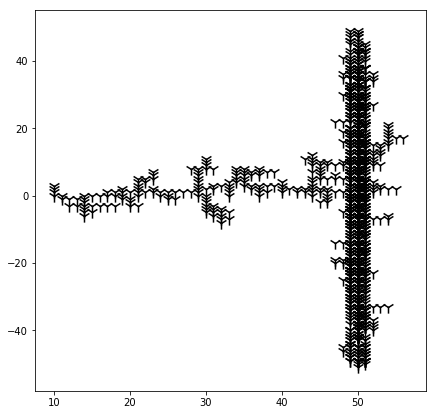

In [5]:
plt.figure(figsize=(7, 7))
for i in d:
    plt.scatter(i[0], i[1], s=150, marker='1', c='k')

## 加入不可穿透墙壁

In [7]:
d = [np.array([0, 0])]
c = 1500
b = 30000
for n in range(c):
    g = np.random.rand()
    x = np.zeros(2)
    if g <= 0.25:
        x[0] = 50
        x[1] = np.random.randint(-50, 50)
    elif g <= 0.5 and g > 0.25:
        x[0] = -50
        x[1] = np.random.randint(-50, 50)
    elif g <= 0.75 and g > 0.5:
        x[1] = 50
        x[0] = np.random.randint(-50, 50)
    elif g <= 1:
        x[1] = -50
        x[0] = np.random.randint(-50, 50)

    track = [x]  # 记录每个粒子的轨迹

    for i in range(b):  # 步数
        p = np.random.rand()

        if p < 0.5:  # x方向行走
            x[0] = walk1(1, x[0])
        else:  # y方向行走
            x[1] = walk1(1, x[1])

        if abs(x[0]) > 50 or abs(x[1]) > 50:  # 出圈就重走
            x = track[-1]
            continue

        flag = 0  # 标志是否撞墙

        if x[0] == 10 and x[1] <= 15 and x[1] >= 15:  # (10,-15--15)的墙壁
            x = track[-1]
            flag = 1

        if flag == 0:  # 可以继续走下去，记录下坐标作为轨迹
            track.append(x)

        e = len(d)
        for m in range(len(d)):
            if ((abs(x[0]-d[m][0]) == 0 and abs(x[1]-d[m][1]) == 1) or (abs(x[0]-d[m][0]) == 1 and abs(x[1]-d[m][1]) == 0)) and (not(x[0] == 10 and x[1] > -15 and x[1] < 15)):

                d.append(x)
                break
        if len(d) != e:
            break

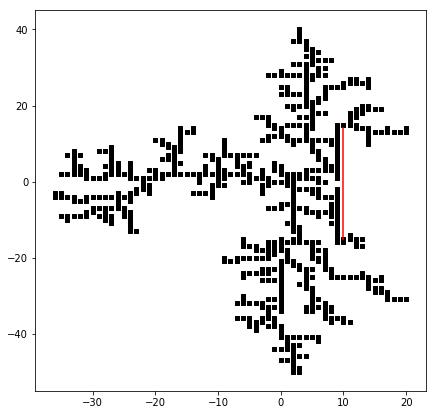

In [8]:
x0 = 10*np.ones(30)
y0 = np.arange(-15, 15, 1)
plt.figure(figsize=(7, 7))
for i in d:
    plt.scatter(i[0], i[1], s=15, marker='s', c='k')

plt.plot(x0, y0, "r")

## 二维平面生长

In [4]:
d = [np.array([0, 0])]
particles = []
c = 1000
b = 10000
for n in range(c):
    x = np.zeros(2)
    x[0] = np.random.randint(-5, 5)
    x[1] = np.random.randint(-5, 5)
#     x=np.array([0,0])
    track = []
    for i in range(b):  # 步数
        p = np.random.rand()

        if p < 0.5:  # x方向行走
            x[0] = walk1(1, x[0])
        else:  # y方向行走
            x[1] = walk1(1, x[1])

        flag = 1
        for m in range(len(d)):
            if (abs(x[0]-d[m][0]) == 0 and abs(x[1]-d[m][1]) == 0):
                flag = 0
                break
        if flag == 1:
            d.append(x)
            particles.append(x)
            break

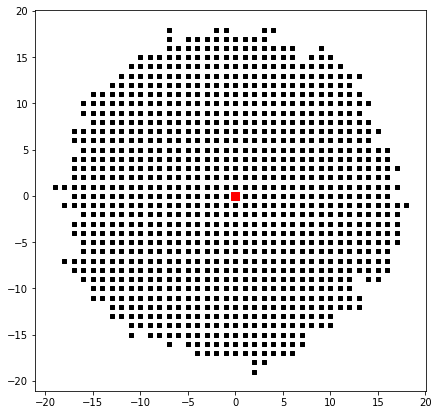

In [6]:
plt.figure(figsize=(7, 7))
for i in particles:
    plt.scatter(i[0], i[1], s=15, marker='s', c='k')

plt.scatter(0, 0, s=50, marker='s', c='r')

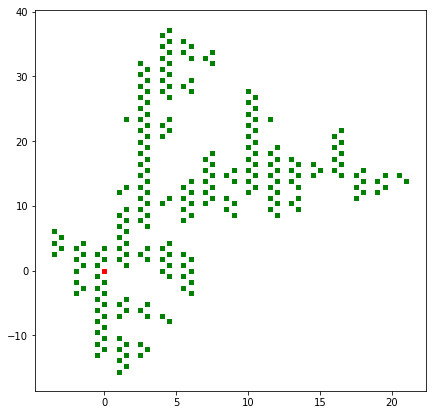

In [31]:
d = [np.array([0, 0])]
plt.figure(figsize=(7, 7))
plt.scatter(d[0][0], d[0][1], s=15, marker='s', c='r')
c = 2000
b = 10000
flag = [1]
for n in range(c):
    x = np.zeros(2)
    n = np.random.randint(40, 50)
    x[0] = n*1.5
    x[1] = n*np.sqrt(3)/2+np.random.randint(-5, 5)*np.sqrt(3)
    type = 1
    for i in range(b):  # 步数
        p = np.random.rand()
        if type == 1:  # 模式1行走
            p2 = np.random.rand()
            type = 2
            if p2 <= 1/3:
                x[0] -= 0.5
                x[1] += np.sqrt(3)/2
            elif p2 > 1/3 and p2 <= 2/3:
                x[0] -= 0.5
                x[1] -= np.sqrt(3)/2
            elif p2 > 2/3 and p2 <= 1:
                x[0] += 1
        else:  # 模式2行走
            p2 = np.random.rand()
            type = 1
            if p2 <= 1/3:
                x[0] += 0.5
                x[1] += np.sqrt(3)/2
            elif p2 > 1/3 and p2 <= 2/3:
                x[0] += 0.5
                x[1] -= np.sqrt(3)/2
            elif p2 > 2/3 and p2 <= 1:
                x[0] -= 1
        e = len(d)
        for m in range(len(d)):
            if flag[m] == 1 and ((x[1] == d[m][1] and x[0]-d[m][0] == 1) or (x[0]-d[m][0] == -0.5 and abs(x[1]-d[m][1]) < 1 and abs(x[1]-d[m][1]) > 0.6)):  # 接近模式1的粒子成为模式2
                plt.scatter(x[0], x[1], s=15, marker='s', c='g')
                d.append(x)
                flag.append(2)
                break
            if flag[m] == 2 and ((x[1] == d[m][1] and x[0]-d[m][0] == -1) or (x[0]-d[m][0] == 0.5 and abs(x[1]-d[m][1]) < 1 and abs(x[1]-d[m][1]) > 0.6)):  # 接近模式2的粒子成为模式1
                plt.scatter(x[0], x[1], s=15, marker='s', c='g')
                d.append(x)
                flag.append(1)
                break
        if len(d) != e:
            break

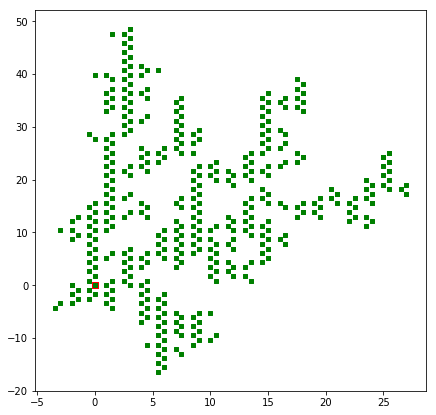

In [29]:
plt.figure(figsize=(7, 7))
plt.scatter(d[0][0], d[0][1], s=30, marker='s', c='r')
for i in range(1, len(d)):
    plt.scatter(d[i][0], d[i][1], s=10, marker='s', c='g')

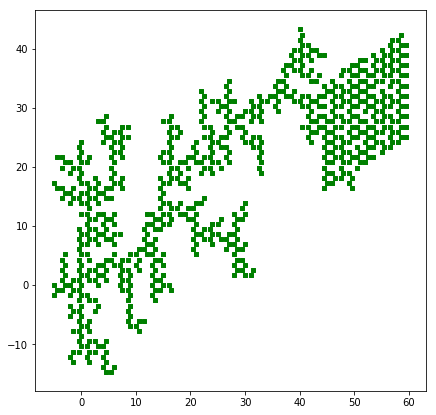

In [34]:
d = [np.array([0, 0])]
plt.figure(figsize=(7, 7))
plt.scatter(d[0][0], d[0][1], s=15, marker='s', c='r')
c = 5000
b = 15000
flag = [1]
for n in range(c):
    x = np.zeros(2)
    n = np.random.randint(30, 40)
    x[0] = n*1.5
    x[1] = n*np.sqrt(3)/2+np.random.randint(-5, 5)*np.sqrt(3)
    type = 1
    track = [x]
    for i in range(b):  # 步数
        p = np.random.rand()
        if type == 1:  # 模式1行走
            p2 = np.random.rand()
            type = 2
            if p2 <= 1/3:
                x[0] -= 0.5
                x[1] += np.sqrt(3)/2
            elif p2 > 1/3 and p2 <= 2/3:
                x[0] -= 0.5
                x[1] -= np.sqrt(3)/2
            elif p2 > 2/3 and p2 <= 1:
                x[0] += 1
        else:  # 模式2行走
            p2 = np.random.rand()
            type = 1
            if p2 <= 1/3:
                x[0] += 0.5
                x[1] += np.sqrt(3)/2
            elif p2 > 1/3 and p2 <= 2/3:
                x[0] += 0.5
                x[1] -= np.sqrt(3)/2
            elif p2 > 2/3 and p2 <= 1:
                x[0] -= 1
        if abs(x[0]) > 60 or abs(x[1]) > 60:  # 出圈就重走
            x = track[-1]
            continue
        e = len(d)
        for m in range(len(d)):
            if flag[m] == 1 and ((x[1] == d[m][1] and x[0]-d[m][0] == 1) or (x[0]-d[m][0] == -0.5 and abs(x[1]-d[m][1]) < 1 and abs(x[1]-d[m][1]) > 0.6)):  # 接近模式1的粒子成为模式2
                plt.scatter(x[0], x[1], s=15, marker='s', c='g')
                d.append(x)
                flag.append(2)
                break
            if flag[m] == 2 and ((x[1] == d[m][1] and x[0]-d[m][0] == -1) or (x[0]-d[m][0] == 0.5 and abs(x[1]-d[m][1]) < 1 and abs(x[1]-d[m][1]) > 0.6)):  # 接近模式2的粒子成为模式1
                plt.scatter(x[0], x[1], s=15, marker='s', c='g')
                d.append(x)
                flag.append(1)
                break
        if len(d) != e:
            break

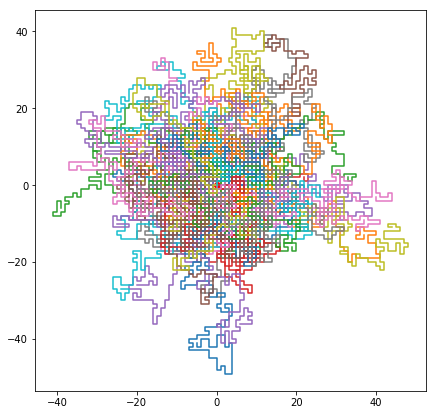

In [78]:
# 自回避最终
"""
如果用list记录轨迹，x被加入list项中，当x改变时list的项也会改变
"""
plt.figure(figsize=(7, 7))
plt.plot(0, 0, "ro")
for n in range(300):
    x = np.array([0, 0])
    trackx = np.array(x[0]).reshape(1, 1)
    tracky = np.array(x[1]).reshape(1, 1)
    for i in range(1000):

        x = walk2(1, x)
        flag = 0
#         print(trackx)
#         print(tracky)
        for k in range(trackx.shape[1]):
            if trackx[0, k] == x[0] and tracky[0, k] == x[1]:
                flag = 1
                x[0] = trackx[0, -1]
                x[1] = tracky[0, -1]
                break
#         print(flag)
        if flag == 0:
            trackx = np.column_stack((trackx, np.array(x[0])))
            tracky = np.column_stack((tracky, np.array(x[1])))
#         print(x)

    trackx = trackx.reshape(trackx.shape[1], 1)
    tracky = tracky.reshape(tracky.shape[1], 1)
    plt.plot(trackx, tracky)

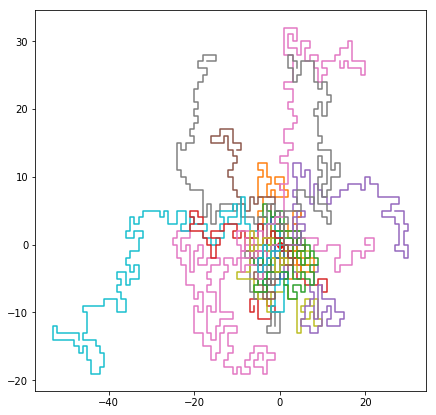

In [79]:
# 自回避最终
"""
如果用list记录轨迹，x被加入list项中，当x改变时list的项也会改变
"""
plt.figure(figsize=(7, 7))
plt.plot(0, 0, "ro")
for n in range(30):
    x = np.array([0, 0])
    trackx = np.array(x[0]).reshape(1, 1)
    tracky = np.array(x[1]).reshape(1, 1)
    for i in range(1000):

        x = walk2(1, x)
        flag = 0
#         print(trackx)
#         print(tracky)
        for k in range(trackx.shape[1]):
            if trackx[0, k] == x[0] and tracky[0, k] == x[1]:
                flag = 1
                x[0] = trackx[0, -1]
                x[1] = tracky[0, -1]
                break
#         print(flag)
        if flag == 0:
            trackx = np.column_stack((trackx, np.array(x[0])))
            tracky = np.column_stack((tracky, np.array(x[1])))
#         print(x)

    trackx = trackx.reshape(trackx.shape[1], 1)
    tracky = tracky.reshape(tracky.shape[1], 1)
    plt.plot(trackx, tracky)